In [2]:
import pandas as pd
import matplotlib.pyplot as plt


fil = "stats.csv"

df = pd.read_csv(fil, encoding="latin1", delimiter=";")

In [3]:
df.nlargest(3,"G")[["Player","G"]]

,Player,G
0,Bam Adebayo,23
121,Kyle Lowry,23
124,Caleb Martin,23


In [4]:
df.groupby("Tm")["G"].max().sort_values(ascending=False)

Tm
MIA    23
BOS    20
DEN    20
LAL    16
GSW    13
NYK    11
PHI    11
PHO    11
SAC     7
ATL     6
MEM     6
CLE     5
LAC     5
MIL     5
MIN     5
BRK     4
Name: G, dtype: int64

In [5]:
df[df["Tm"]=="LAL"]["Player"].value_counts().sum()

15

In [6]:
df[(df["MP"] > 30) & (df["FG%"] > 0.5)]["Player"]

4              Jarrett Allen
6      Giannis Antetokounmpo
8              Deandre Ayton
20              Devin Booker
48             Anthony Davis
64               Rudy Gobert
65              Aaron Gordon
77             Tobias Harris
97           Cameron Johnson
99              Nikola Joki?
113            Kawhi Leonard
118              Brook Lopez
124             Caleb Martin
195       Xavier Tillman Sr.
Name: Player, dtype: object

In [7]:
df.query("MP > 30 and `FG%` > 0.5")["Player"]

4              Jarrett Allen
6      Giannis Antetokounmpo
8              Deandre Ayton
20              Devin Booker
48             Anthony Davis
64               Rudy Gobert
65              Aaron Gordon
77             Tobias Harris
97           Cameron Johnson
99              Nikola Joki?
113            Kawhi Leonard
118              Brook Lopez
124             Caleb Martin
195       Xavier Tillman Sr.
Name: Player, dtype: object

In [8]:
df.pivot_table(values="PTS", index="Tm", aggfunc="sum").sort_values(by="PTS", ascending=False)

,PTS
Tm,
LAC,139.8
MIL,137.5
MIA,134.4
PHO,130.5
ATL,119.6
BOS,118.9
SAC,118.1
LAL,118.0
GSW,117.5


In [9]:
df["Def"] = df["TRB"] + df["BLK"].apply(lambda x: 2*x) + df["STL"].apply(lambda x: 2*x)

In [10]:
df["Off"] = df["PTS"] + df["AST"]

In [11]:
df["Godhet"] = df["Off"] + df["Def"].apply(lambda x: 2*x)

In [12]:
df.pivot_table(values=["Off", "Def"], index="Tm", aggfunc="sum").sort_values(by="Off", ascending=False)

,Def,Off
Tm,,
MIL,75.7,167.8
LAC,71.7,165.6
MIA,75.3,161.5
PHO,77.2,159.9
GSW,74.9,146.8
ATL,70.6,146.1
BOS,73.9,144.5
LAL,76.8,144.5
DEN,72.3,143.9


In [13]:
df.pivot_table(values="Godhet", index="Tm", aggfunc="sum").sort_values(by="Godhet", ascending=False)

,Godhet
Tm,
MIL,319.2
PHO,314.3
MIA,312.1
LAC,309.0
LAL,298.1
GSW,296.6
BOS,292.3
DEN,288.5
SAC,287.6


<Axes: xlabel='Def', ylabel='Off'>

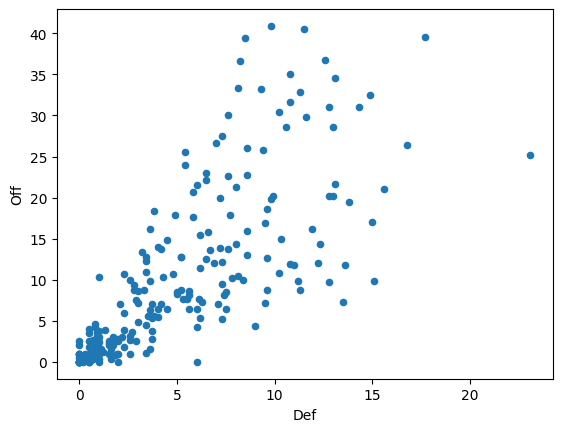

In [14]:
df.plot(kind="scatter", x="Def", y="Off")

In [15]:
df["Off"].corr(df["Def"])

0.749853004825499

<Axes: xlabel='Def', ylabel='Off'>

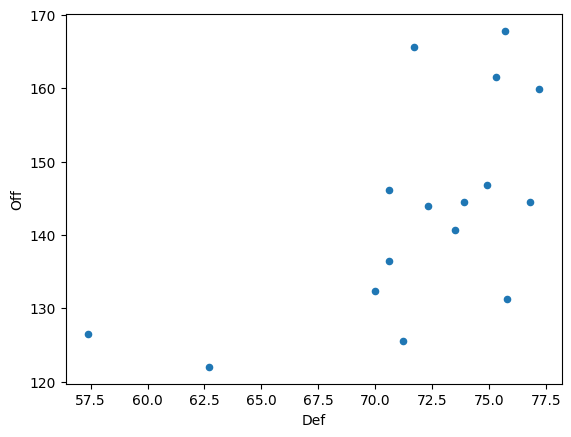

In [16]:
df.groupby("Tm").sum().plot(kind="scatter", x="Def", y="Off")

<Axes: ylabel='Frequency'>

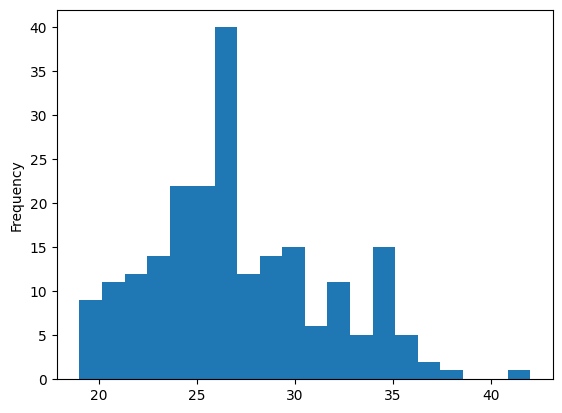

In [17]:
df["Age"].plot(kind="hist",bins=20)

In [18]:
df.memory_usage(deep=True).sum()

88028